In [2]:
# Name: Angela Wilburn

# Course: IT445 Programming for Data Analysis

# Assignment: Final_Project_Deliverable_1

# Description: This notebook explores the data I am considering using for my final project. 
# The data in this notebook is movie metadata and reviews from IMDB and Sentiment training data. 
# Refrences: 
#Aditya Pal, Abhilash Barigidad, Abhijit Mustafi. (2020). IMDb Movie Reviews Dataset. 
    #IEEE Dataport. https://dx.doi.org/10.21227/zm1y-b270
# MATTHEWWALLER, MBD Movie Reviews For Binary Sentiment Analysis
    #https://www.kaggle.com/datasets/mwallerphunware/imbd-movie-reviews-for-binary-sentiment-analysis

# Combine multiple CSV files containing movie metadata into a Pandas data frame and verify that the data frame was created correctly.

In [46]:
# Import Nessasry libraries 

import pandas as pd
import os

# Set the directory where the CSV files are located for movie metadata
data_dir = "dataset/movies_per_genre/"

# Get a list of all CSV files in the directory
csv_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir)]

# Create an empty list to store the DataFrames of all CSV files
dfs = []

# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    # Extract the file name without the extension
    file_name = os.path.splitext(os.path.basename(csv_file))[0]
    # Add a new column with the file name
    df['Combined Genre'] = file_name
    dfs.append(df)


# Combine the DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Verify the first 5 lines of the first Excel sheet are in the data frame
combined_df.head(5)

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,Combined Genre
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,Action
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...,Action
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...,Action
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...,Action
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...,Action


In [14]:
# Verify the last 5 lines of the last excel sheet are in the dataframe
combined_df.tail(5)

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
1695,Catch-22,1970,R,2h 2min,Comedy; Drama; War;,24 June 1970 (USA),7.1,21424,145,https://www.imdb.com/title/tt0065528/reviews/_...
1696,The Great Raid,2005,R,2h 12min,Action; Drama; War;,12 August 2005 (USA),6.7,20965,194,https://www.imdb.com/title/tt0326905/reviews/_...
1697,Saints and Soldiers,2003,PG-13,1h 30min,Action; Drama; War;,25 March 2005 (USA),6.7,19730,163,https://www.imdb.com/title/tt0373283/reviews/_...
1698,Stop-Loss,2008,R,1h 52min,Drama; War;,28 March 2008 (USA),6.4,19456,102,https://www.imdb.com/title/tt0489281/reviews/_...
1699,The Alamo,2004,PG-13,2h 17min,Drama; History; War;,9 April 2004 (USA),6.0,19290,306,https://www.imdb.com/title/tt0318974/reviews/_...


# Descriptive statistics of the data frame of movie metadata.

In [15]:
# Print the shape of the data to find how many rows and columns
print("Shape:", combined_df.shape)

Shape: (1700, 10)


In [16]:
#Print the columns in the data frame 
print("List of Columns:", combined_df.columns)

List of Columns: Index(['name', 'year', 'movie_rated', 'run_length', 'genres', 'release_date',
       'rating', 'num_raters', 'num_reviews', 'review_url'],
      dtype='object')


In [17]:
#Show the data types of columns
print("Data types:", combined_df.dtypes)

Data types: name             object
year              int64
movie_rated      object
run_length       object
genres           object
release_date     object
rating          float64
num_raters        int64
num_reviews       int64
review_url       object
dtype: object


In [18]:
# Show statistics for the name column
df_name = combined_df[['name']]
df_name.describe()

,name
count,1700
unique,1145
top,The Lion King
freq,4


In [19]:
# Show statistics for the rating column
df_rating = combined_df[['rating']]
df_rating.describe()

,rating
count,1700.000000
mean,7.457706
std,0.736682
min,3.500000
25%,7.000000
50%,7.600000
75%,8.000000
max,9.300000


# Combine multiple csv review data into Pandas data frame and verify the data frame

In [47]:
# Set the directory where the CSV files are located for reviews
data_dir = "dataset/reviews_per_movie_raw/"

# Get a list of all CSV files in the directory
csv_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir)]
# Create an empty list to store the DataFrames
dfs = []

# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        #Get the movie title of the review based on the CSV file name and remove the year 
        movie_title = os.path.splitext(os.path.basename(csv_file))[0][:-5]
        df['name'] = movie_title
        dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
combined_review_df = pd.concat(dfs, ignore_index=True)

# Verify the first 5 lines of the first excel sheet are in the dataframe
combined_review_df.head(5)

,username,rating,helpful,total,date,title,review,name
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 Cloverfield Lane
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 Cloverfield Lane
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 Cloverfield Lane
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",10 Cloverfield Lane
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 Cloverfield Lane


In [21]:
# Verify the first 5 lines of the first excel sheet are in the dataframe
combined_review_df.tail(5)

,username,rating,helpful,total,date,title,review,name
931560,rupie,8,0,1,31 January 2000,hard to beat for its genre\n,I found it most interesting to read the commen...,Zulu
931561,JohnSeal,8,0,1,10 January 2000,One of the great war films\n,Zulu is a film I can watch over and over again...,Zulu
931562,rmaki,10,0,1,4 September 1999,Great battle scenes!\n,"This is a fantastic film of a true, historical...",Zulu
931563,Grand,9,0,1,10 June 1999,"Ye Gods, what a stirring movie!\n",(I was getting chills just casting my vote for...,Zulu
931564,mike-411,10,0,2,7 November 1998,One of the few greats\n,I was immediately drawn into this movie when I...,Zulu


# Descriptive statistics of the data frame of movie reviews.

In [22]:
# Print the shape of the data to find how many rows and columns
print("Shape:", combined_review_df.shape)

Shape: (931565, 8)


In [23]:
#Print the columns in the data frame 
print("List of Columns:", combined_review_df.columns)

List of Columns: Index(['username', 'rating', 'helpful', 'total', 'date', 'title', 'review',
       'name'],
      dtype='object')


In [24]:
#Show the datatypes of columns
print("Data types:", combined_review_df.dtypes)

Data types: username    object
rating      object
helpful      int64
total        int64
date        object
title       object
review      object
name        object
dtype: object


In [25]:
# Show statistics for the name column
df_review_name = combined_review_df[['name']]
df_review_name.describe()

,name
count,931565
unique,1144
top,Joker
freq,10046


In [26]:
# Show statistics for the review  column
df_review_review = combined_review_df[['review']]
df_review_review.describe()

,review
count,931565
unique,929543
top,I have never seen such an amazing film since I...
freq,24


## Merge movie Metadata and review on movie title only returning matching rows.

In [48]:
#Join datasets using pandas
combined_df = combined_df.drop_duplicates()
merged_dataset =pd.merge(combined_df, combined_review_df, on=['name'], how='inner')
merged_dataset.head(5)

,name,year,movie_rated,run_length,genres,release_date,rating_x,num_raters,num_reviews,review_url,Combined Genre,username,rating_y,helpful,total,date,title,review
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,Action,MR_Heraclius,10,85,92,12 February 2020,The Dark Knight\n,"Confidently directed, dark, brooding, and pack..."
1,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,Action,Smells_Like_Cheese,10,760,941,20 July 2008,The Batman of our dreams! So much more than a...,I got to see The Dark Knight on Wednesday nigh...
2,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,Action,straightblaster,10,3746,4780,9 July 2008,Film surpasses the hype\n,We've been subjected to enormous amounts of hy...
3,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,Action,Aaron_Kyle,9,259,325,12 October 2018,Superhero Genre - Alive and kicking\n,First I'd controversially like to point out th...
4,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,Action,filmquestint,10,532,687,20 July 2008,Heath Ledger's Dark and Brilliant Swan Song\n,"I couldn't believe ""The Dark knight"" could liv..."


In [28]:
# Print the shape of the data to find how many rows and columns
print("Shape:", merged_dataset.shape)

Shape: (1067384, 17)


In [29]:
# Get the column names 
print("Columns:", merged_dataset.columns)

Columns: Index(['name', 'year', 'movie_rated', 'run_length', 'genres', 'release_date',
       'rating_x', 'num_raters', 'num_reviews', 'review_url', 'username',
       'rating_y', 'helpful', 'total', 'date', 'title', 'review'],
      dtype='object')


In [30]:
#Show the datatypes of columns
print("Data types:", merged_dataset.dtypes)

Data types: name             object
year              int64
movie_rated      object
run_length       object
genres           object
release_date     object
rating_x        float64
num_raters        int64
num_reviews       int64
review_url       object
username         object
rating_y         object
helpful           int64
total             int64
date             object
title            object
review           object
dtype: object


In [31]:
# Show statistics for the name column
merged_dataset_name = merged_dataset[['name']]
merged_dataset_name.describe()

,name
count,1067384
unique,1040
top,Joker
freq,20092


In [32]:
# Show statistics for the review column
merged_dataset_review = merged_dataset[['review']]
merged_dataset_review.describe()

,review
count,1067384
unique,792779
top,I have never seen such an amazing film since I...
freq,23


In [33]:
merged_dataset_username = merged_dataset[['username']]
merged_dataset_username.describe()

,username
count,1067384
unique,372643
top,SnoopyStyle
freq,1252


In [34]:
merged_dataset_movie_rating= merged_dataset[['rating_y']]
merged_dataset_movie_rating.describe()

,rating_y
count,1067384
unique,11
top,10
freq,274034


In [25]:
# Group by 'title' and count 'review'
title_review_count = merged_dataset.groupby('name')['review'].count()

# Display the DataFrame
print(title_review_count)

name
10 Cloverfield Lane           1504
10 Things I Hate About You     611
12 Angry Men                  3022
12 Monkeys                    1899
12 Strong                      371
                              ... 
Zero Dark Thirty               709
Zodiac                        1534
Zombieland                    1426
Zootopia                      1402
Zulu                           261
Name: review, Length: 1040, dtype: int64


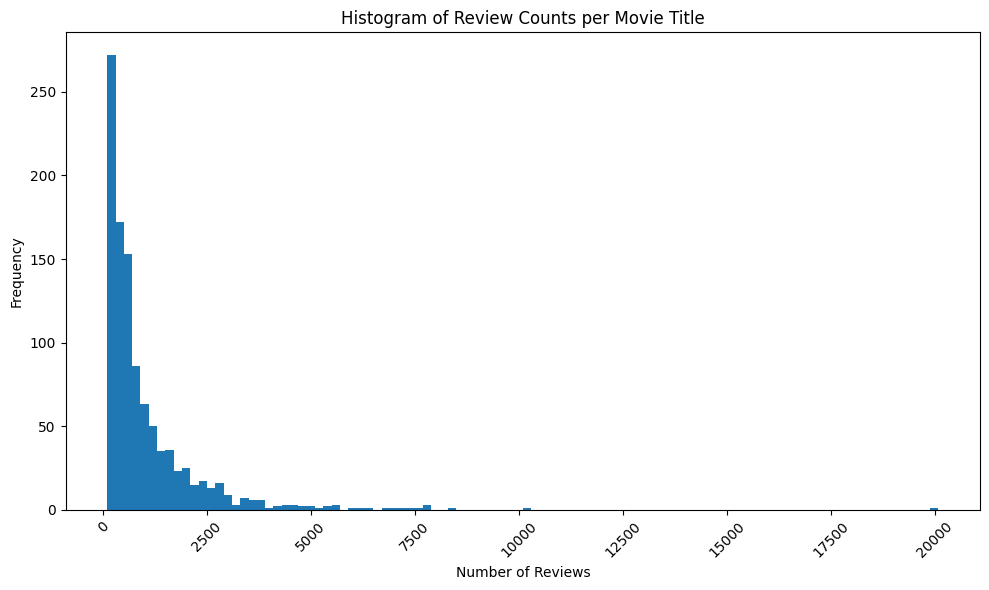

In [35]:
# Import necessary libraries to create a histogram of Titles and Review Frequency
import matplotlib.pyplot as plt

# Create a group by frequency
title_review_count = merged_dataset.groupby('name')['review'].count()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(title_review_count, bins=100)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of Review Counts per Movie Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
# Save merged dataset for project 
merged_dataset.to_csv('Merged_Dataset.csv', index=False)

# Import Sentiment Training Data 

In [40]:
# Read the CSV file into a DataFrame
movieReviewTraining = pd.read_csv('archive/MovieReviewTrainingDatabase.csv')

# Display the first five rows of the DataFrame
movieReviewTraining.head()

,sentiment,review
0,Positive,With all this stuff going down at the moment w...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...
2,Negative,The film starts with a manager (Nicholas Bell)...
3,Negative,It must be assumed that those who praised this...
4,Positive,Superbly trashy and wondrously unpretentious 8...


In [41]:
# Verify the last 5 lines of the last excel sheet are in the dataframe
movieReviewTraining.tail()

,sentiment,review
24995,Negative,It seems like more consideration has gone into...
24996,Negative,I don't believe they made this film. Completel...
24997,Negative,"Guy is a loser. Can't get girls, needs to buil..."
24998,Negative,This 30 minute documentary Buñuel made in the ...
24999,Positive,I saw this movie as a child and it broke my he...


# Descriptive statistics of the data frame of sentiment review training set

In [42]:
# Print the shape of the data to find how many rows and columns
print("Shape:", movieReviewTraining.shape)

Shape: (25000, 2)


In [43]:
# Get the column names 
print("Columns:", movieReviewTraining.columns)

Columns: Index(['sentiment', 'review'], dtype='object')


In [44]:
#Show the datatypes of columns
print("Data types:", movieReviewTraining.dtypes)

Data types: sentiment    object
review       object
dtype: object


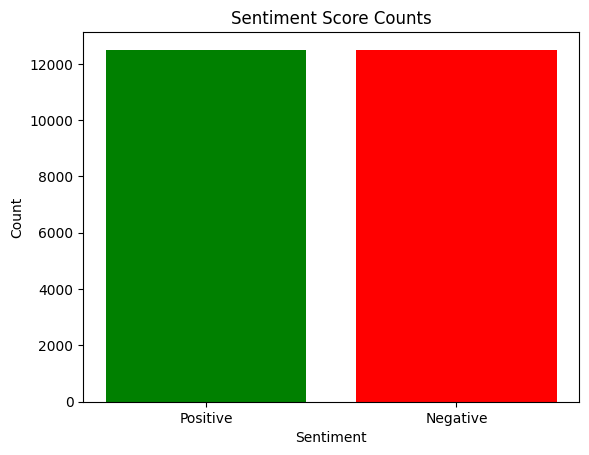

In [45]:
# Import necessary libraries to create a bar chart of Sentiment counts
# Create a bar plot
import matplotlib.pyplot as plt
sentiment_counts = movieReviewTraining['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Score Counts')
plt.show()